In [81]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob #For finding all file paths matching a specified pattern

In [82]:
# Step 1: Load the 10 flat-field images and create the master flat-field
file_pattern = r"..\FITS_Files\3.3.4_3_flat_fields_10_sec_BLUE.{:08d}.FLAT.FIT"
flat_files = [file_pattern.format(i) for i in range(10)]  # Adjust to actual file numbers

# Load and combine the flat-field images
flat_stack = [] #Initializes an empty list to store the flat-field data.
for file in flat_files:
    flat_data = fits.getdata(file) # Reads the FITS file and extracts the data (the 2D array of pixel counts).
    flat_stack.append(flat_data)

# Take the median of the flat-field stack to reduce noise
flat_stack = np.array(flat_stack) # Converts flat_stack as a list of 2D arrays, into a 3D numpy array.
master_flat = np.median(flat_stack, axis=0) # Computes the median value of each pixel across the stack of flat-field images along the first axis 

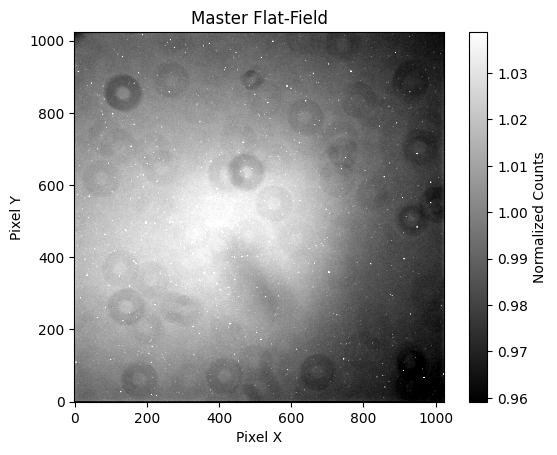

In [83]:
# Step 2: Normalize the master flat-field to its typical count level
mean_flat = np.mean(master_flat)
normalized_flat = master_flat / mean_flat

# Save the master flat-field to a new FITS file
fits.writeto('master_flat_normalized.fits', normalized_flat, overwrite=True)
# Writes the normalized master flat-field to a new FITS file: master_flat_normalized.fits.

# Plot the master flat-field
plt.imshow(normalized_flat, cmap='gray', origin='lower', vmin=np.percentile(normalized_flat, 1), vmax=np.percentile(normalized_flat, 99))
# Displays the 2D image of the normalized flat-field
plt.colorbar(label='Normalized Counts')
plt.title('Master Flat-Field')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

In [84]:
# Step 3: Quantify regions of low counts compared to brightest part
max_count = np.max(normalized_flat)
min_count = np.min(normalized_flat)

# Find regions of low and high counts
low_region_percentage = (min_count / max_count) * 100
print(f"Region with lowest light receives {low_region_percentage:.2f}% of the brightest region's light.")


Region with lowest light receives 6.58% of the brightest region's light.


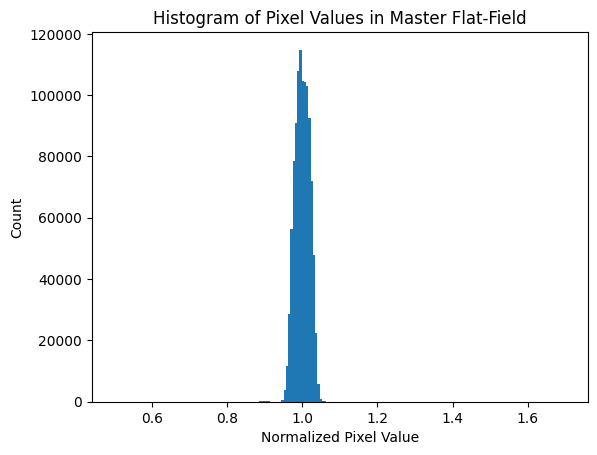

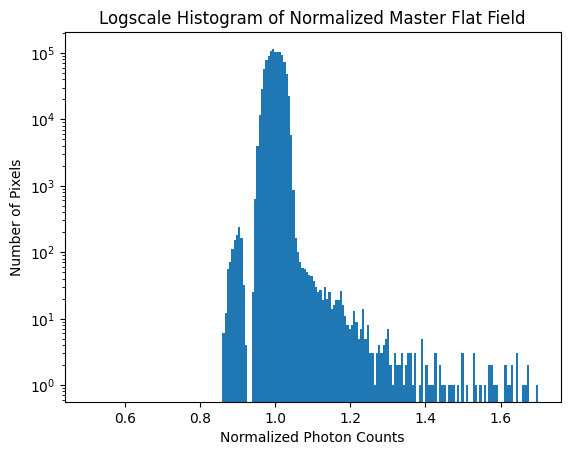

In [85]:
# Step 4: Plot a histogram of the pixel values to check for dead pixels
plt.hist(normalized_flat.flatten(), bins=200, range=(0.5, 1.7))
plt.title('Histogram of Pixel Values in Master Flat-Field')
plt.xlabel('Normalized Pixel Value')
plt.ylabel('Count')
plt.show()

# Plot histogram on log scale
plt.hist(normalized_flat.flatten(), range=(0.5,1.7), bins=200,  log=True)
plt.xlabel('Normalized Photon Counts')
plt.ylabel('Number of Pixels')
plt.title('Logscale Histogram of Normalized Master Flat Field')
plt.show()